<a href="https://colab.research.google.com/github/hiamoreena/DAT-401-Project-2/blob/main/academic_success_dataset_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Student Success Prediction Models
#### By: Zeynep Turk and Amoreena Ordoñez

Our goal in this project is to train various machine learning models in the hopes of optimizing accuracy of predicting whether a student in higher education will graduate or dropout. These predictions are important as they can inform schools/social outreach organizations/early intervention/support resources for students with specific demographics, workload, or baesed on location blah blah brain is mush. The dataset contains 4,424 student profiles/information with 34 feature variables and 1 predictor variable labeled target. The features include information on parent education level, enrolled credit units, personal demographics, marital status, and gdp of student location.

In [ ]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
url = "https://raw.githubusercontent.com/zsturk/Dat402_Proj1/refs/heads/main/data.csv"
df = pd.read_csv(url, sep = ";")

## Data cleaning and exploration

In [ ]:
print("Dimensions of the dataframe:",  df.shape)
df.head()

Dimensions of the dataframe: (4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.dropna()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


When we check the categories in the "Target" column, we can see that there are three categories. For the sake of classification, we can extract the "enrolled category" and train our models to classify for graduate vs dropout.

In [ ]:
df.value_counts("Target")

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [ ]:
df_enrolled = df[df["Target"] == "Enrolled"]
df = df[df["Target"] != "Enrolled"]
print("Dimensions of dataframe with just enrolled students:", df_enrolled.shape)
print("Dimensions of dataframe without enrolled students:", df.shape)

Dimensions of dataframe with just enrolled students: (794, 37)
Dimensions of dataframe without enrolled students: (3630, 37)


## Exploratory Analysis
Start with checking data for outliers that cause noise and skew model results.

In [ ]:
## General sweep for outliers in the data by analyzing each feature's descriptive statistics
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256,0.608540
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986,0.488144
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


application mode
previous qualification
Nacionality


In [ ]:
## plot outliers, maybe not nacionality though because linked to gdp and other variables?
## Note to Z: honestly I'm so over plots maybe I just run code to remove rows with any crazy outliers. Thoughts?

Correlations!

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.



<Axes: >

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from font(s) DejaVu Sans.



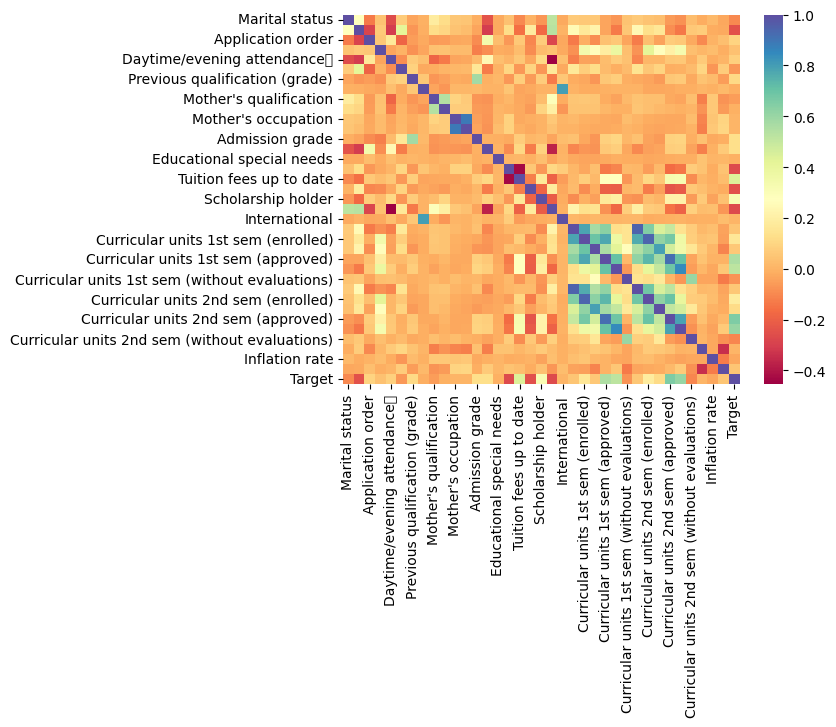

In [ ]:
sns.heatmap(df.corr('pearson'), cmap = "Spectral")
## uglyyyyy, readable? wtf are those errors

## Predictive Modeling

In [ ]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size = 0.2, random_state = 42)


## Unsupervised learning

### PCA
Because high dimensional data, lots of features, curse of dimensionality

In [ ]:
## standardize the feature variables
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

## create PCA components
pca = PCA(.80)
pca.fit(X_train_std)

## how much variance was captured in the three we kept
print("Percent of variance explained by each principal component: ", np.round(pca.explained_variance_ratio_, 4)*100)
print("Singular values of each prinicipal component: ", np.round(pca.singular_values_, 4))

## get names of feature components


Percent of variance explained by each principal component:  [18.04 10.38  5.85  5.4   5.2   4.79  4.39  4.25  3.66  3.38  3.01  2.82
  2.76  2.48  2.38  2.25]
Singular values of each prinicipal component:  [137.3493 104.1472  78.2324  75.1654  73.6966  70.7905  67.7287  66.6755
  61.8812  59.4771  56.1409  54.3326  53.6769  50.9657  49.8668  48.5228]


In [ ]:
#Plot
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(X_train_std, labels = labels, dimensions = range(8), width = 1000,
                        height = 1000, color = y_train)
fig.update_traces(diagonal_visible = False)
fig.show()

PC's account for 80% as declared in PCA of variance. Singular values are equal to the 2 norms of the n_ciomponent variables in the lower dimensional space. graphs help visualize how the components interact with each other, important because blah blah blah. ONly looking at half of the chosen components in graphs. Making the model next

In [ ]:
## making the model


clf = DecisionTreeClassifier(random_state = 11)
clf.fit(X_train_std, y_train)

y_pred = clf.predict(X_test_std)

print("Accuracy Score: {:.5f}".format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.85813


findings

### Random Forest

In [ ]:
# instantiate Random Forest classifier
random_forest = RandomForestClassifier(n_estimators = 100,
                                       random_state = 123,
                                       bootstrap = True,
                                       oob_score = True)
# ^check parameters documentation
#how important x y z parameter?

# fit and predict the model
random_forest.fit(X_train, y_train)
print("Out-of-bag score:", random_forest.oob_score_)
rf_pred = random_forest.predict(X_test)

# evaluate the model
print("Accuracy of Random Forest Classifier:", accuracy_score(y_test, rf_pred))

Out-of-bag score: 0.9025482093663911
Accuracy of Random Forest Classifier: 0.9035812672176309


In [ ]:
#feature importance, well it looks somewhat useless
feature_importance = random_forest.feature_importances_
feature_importance

array([0.00223225, 0.01521846, 0.00963643, 0.02553795, 0.00128785,
       0.00371285, 0.02298237, 0.00212947, 0.01266766, 0.01313547,
       0.01420601, 0.01690152, 0.02967517, 0.00489761, 0.00096814,
       0.01030373, 0.06624724, 0.00936874, 0.01774777, 0.03207112,
       0.00100259, 0.00576364, 0.01903444, 0.02175535, 0.13153043,
       0.07050996, 0.00352391, 0.00518726, 0.01879149, 0.02737307,
       0.23507423, 0.10831984, 0.0023883 , 0.01305162, 0.01228044,
       0.01348561])

In [ ]:
# for the sake of fun apply model to df_enrolled
rf_pred_enrolled = random_forest.predict(df_enrolled.drop("Target", axis = 1))
#how can I see percentage of predictions
np.unique(rf_pred_enrolled, return_counts = True)

(array(['Dropout', 'Graduate'], dtype=object), array([362, 432]))

### Neural Network
For nueral netwrok we have to recode our string target variable into numeric.

In [ ]:
## recode "Graduate"/"Dropout" with 1/0
encoder = LabelEncoder()
df["Target"] = encoder.fit_transform(df[["Target"]])

##sanity check
df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [ ]:
## new split with numeric target variable, for fun let's try 85/15
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(df.drop('Target', axis=1), df['Target'], test_size = 0.15, random_state = 71)
X_train_cnn = scaler.fit_transform(X_train_cnn)
X_test_cnn = scaler.fit_transform(X_test_cnn)

In [ ]:
## build the model
cnn = MLPClassifier(max_iter = 1000, solver = 'sgd', alpha = 1e-5,hidden_layer_sizes = (10,2), random_state = 39)
cnn.fit(X_train_cnn, y_train_cnn)

y_pred = cnn.predict(X_test_cnn)

## use root mean square error and mean accuracy as evaluation metrics. The smaller the better
rmse = np.sqrt(mean_squared_error(y_test_cnn, y_pred))
print("RMSE of model predictions: ", rmse)
print("Mean accuracy of model predictions: ", cnn.score(X_test_cnn, y_test_cnn))


RMSE of model predictions:  0.31477383755220106
Mean accuracy of model predictions:  0.9009174311926605


Not great, tune parameters using gridsearch since previously chosen intuitively there may be better input parameters to specify.

In [ ]:
mlpc = MLPClassifier(max_iter = 1000)
param_space = {'hidden_layer_sizes': [(100,), (50,50,50)], 'activation': ['relu', 'identity'],
                   'solver': ['sgd', 'adam'], 'alpha': [0.0001, 1e-5]}
search = GridSearchCV(mlpc, param_space, n_jobs = 1, cv = 3)
search.fit(X_train_cnn, y_train_cnn)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning:

Training interrupted by user.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000), n_jobs=1,
             param_grid={'activation': ['relu', 'identity'],
                         'alpha': [0.0001, 1e-05],
                         'hidden_layer_sizes': [(100,), (50, 50, 50)],
                         'solver': ['sgd', 'adam']})

It seems the best estimator is our original one. Plot something about this?

In [ ]:
## Plot??

## Conclusion
* Random forest best model, quite close to neural net.
* Outliers in data that are stopping accuracy of models from going beyond?


References:

Realinho, V., Machado, J., Baptista, L., & Martins, M. V. (2022). Predicting Student Dropout and Academic Success. Data, 7(11), 146. https://doi.org/10.3390/data7110146